In [162]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt 

,course_des,course_name,faq,recom_bkgd,syllabus,des_syllabus
447,M2O2C2 is an invitation to think carefully abo...,2o2c2,Will I get a statement of accomplishment after...,Recommended BackgroundPrevious exposure to cal...,This course is a first taste of multivariable ...,M2O2C2 is an invitation to think carefully abo...


In [2]:
all_courses = pd.read_csv('all_courses.csv', encoding='utf-8')

In [3]:
all_courses['des_syllabus'] = all_courses.course_des + all_courses.syllabus

In [39]:
course_name_des_syllabus = dict(zip(all_courses['course_name'], all_courses['des_syllabus']))

In [ ]:
course_name_des_syllabus

In [5]:
import gensim
from gensim.corpora import TextCorpus, MmCorpus, Dictionary
import nltk

In [8]:
porter = nltk.stem.porter.PorterStemmer()
stop_words = nltk.corpus.stopwords.words('english')

def tokenize(text, stop_words):
    return [token for token in gensim.utils.simple_preprocess(text) if token not in stop_words]

In [54]:
class MyCorpus(gensim.corpora.TextCorpus): 
    def get_texts(self): 
        for string in self.input.values(): # for each relevant file 
            yield tokenize(string, stop_words)

In [43]:

def paragraph_stemmer(string): #and non english word remover
    porter = nltk.stem.porter.PorterStemmer()
    try:
        string = string.replace('\n',' ').replace(',',' ').replace('.',' ').replace('!',' ').replace('?',' ').replace('\r',' ').split(' ')
    except:
        string = str(string)
        string = string.replace('\n',' ').replace(',',' ').replace('.',' ').replace('!',' ').replace('?',' ').replace('\r',' ').split(' ')
        
    new_string = []
    removed_foreign_words = []
    for item in string:
        try:
            new_string.append(porter.stem(item.encode('utf-8').lower()))
        except:
            pass
    return ' '.join(new_string), removed_foreign_words


In [44]:

for i, (key, value) in enumerate(course_name_des_syllabus.items()):
    if (i+1) %100 == 0:
        print i+1
    a, b = paragraph_stemmer(value)
    course_name_des_syllabus[key] = a
    
with open('course_name_des_syllabus.pickle', 'wb') as f:
    pickle.dump(course_name_des_syllabus, f)

100
200
300
400
500
600
700


In [48]:
i = 0
for key, value in course_name_des_syllabus.items():
    if value == '':
        i += 1
        del course_name_des_syllabus[key]

In [51]:
def lda_training(review_corpus, save_string, num_topics=10):
    mycorpus = MyCorpus(review_corpus)
    mycorpus.dictionary.filter_extremes()
    print len(mycorpus.dictionary.token2id)
    sys.stdout.flush()
    mycorpus.dictionary.save('%s_gensim_dict.dict' %save_string)
    MmCorpus.serialize('%s_gensim_corpus.mm' %save_string, mycorpus)
    mm = gensim.corpora.MmCorpus('%s_gensim_corpus.mm' %save_string) 
    print(mm)
    sys.stdout.flush()
    mycorpus.dictionary.items()
    lda = gensim.models.ldamulticore.LdaMulticore(corpus=mm, id2word=mycorpus.dictionary.id2token, num_topics=num_topics, eval_every=10, passes=30, workers=4)
    lda.save(save_string+'.lda')
    return lda

In [62]:
%%time
mycorpus = MyCorpus(course_name_des_syllabus)
mycorpus.dictionary.filter_extremes()
lda_full_7_topics_tours_removed = lda_training(course_name_des_syllabus,'preliminary_model_with_coursera_7_topics', num_topics = 7)
lda_full_7_topics_tours_removed.save('preliminary_model_with_coursera_7_topics.lda')

2601
MmCorpus(778 documents, 2601 features, 67459 non-zero entries)
CPU times: user 2min 4s, sys: 19.6 s, total: 2min 23s
Wall time: 2min 27s


In [61]:
lda_full_20_topics_tours_removed.print_topics()

[u'0.018*learn + 0.014*week + 0.014*student + 0.011*use + 0.009*practic + 0.008*understand + 0.008*develop + 0.008*design + 0.008*educ + 0.007*assess',
 u'0.019*week + 0.011*lectur + 0.010*histori + 0.008*innov + 0.008*world + 0.008*cultur + 0.007*learn + 0.007*us + 0.006*explor + 0.006*student',
 u'0.180*de + 0.086*la + 0.044*le + 0.041*en + 0.035*lo + 0.030*et + 0.030*el + 0.020*que + 0.017*un + 0.014*del',
 u'0.022*music + 0.020*week + 0.013*cour + 0.011*work + 0.010*digit + 0.010*citi + 0.010*write + 0.009*program + 0.008*problem + 0.008*languag',
 u'0.021*data + 0.016*model + 0.012*use + 0.011*week + 0.011*learn + 0.010*statist + 0.009*analysi + 0.008*process + 0.008*cover + 0.007*basic',
 u'0.042*health + 0.018*global + 0.014*modul + 0.012*intern + 0.012*care + 0.012*develop + 0.010*public + 0.010*week + 0.008*system + 0.007*mental',
 u'0.037*week + 0.026*da + 0.015*wave + 0.013*power + 0.013*part + 0.011*practic + 0.011*physic + 0.011*student + 0.011*em + 0.010*fluid',
 u'0.027*

In [63]:
lda_full_7_topics_tours_removed.print_topics()

[u'0.033*lectur + 0.014*art + 0.013*week + 0.012*game + 0.010*assign + 0.009*digit + 0.008*cultur + 0.008*work + 0.008*sport + 0.007*project',
 u'0.024*data + 0.015*use + 0.013*model + 0.013*program + 0.012*learn + 0.009*comput + 0.009*cour + 0.009*network + 0.009*statist + 0.009*languag',
 u'0.015*week + 0.015*problem + 0.015*student + 0.013*system + 0.010*use + 0.009*learn + 0.009*introduct + 0.008*basic + 0.008*algorithm + 0.008*genom',
 u'0.014*week + 0.012*learn + 0.010*student + 0.009*develop + 0.008*use + 0.007*understand + 0.006*social + 0.006*modul + 0.006*project + 0.005*market',
 u'0.026*health + 0.016*week + 0.009*care + 0.008*system + 0.008*modul + 0.007*chang + 0.007*climat + 0.007*global + 0.006*commun + 0.006*develop',
 u'0.031*week + 0.007*scienc + 0.007*understand + 0.007*energi + 0.007*system + 0.006*music + 0.006*function + 0.006*physic + 0.006*unit + 0.006*brain',
 u'0.171*de + 0.082*la + 0.042*le + 0.039*en + 0.033*lo + 0.028*et + 0.028*el + 0.019*que + 0.016*un +

In [209]:
topic_assignments = {1:'Media/Art',
                     2:'Data/Stats',
                     3:'Biosciences',
                     4:'Sociology/Entrepreneurship',
                     5:'Health',
                     6:'Physical Science',
                     7:'Taught in foreign language',
                    }

In [210]:
rows = []
for key, value in course_name_des_syllabus.items():
    result = lda_full_7_topics_tours_removed[mycorpus.dictionary.doc2bow(value.split(' '))]
    row = [key] + [0 for i in range(7)]
    for item in result:
        row[item[0]+1] = item[1]
    rows.append(row)
    
columns = ['course_name']
for i in range(7):
    columns.append(topic_assignments[i+1])
    
course_topic_results = pd.DataFrame(np.array(rows), columns=columns)

In [69]:
course_topic_results

,course_name,art,data/stats,programming,sociology,climate change/public health,fundamental science,taught in foreign language
0,businessandphilo2,0.222561324072,0.0897067618563,0,0.497206863125,0,0.187983190493,0
1,edc,0.290467841468,0.0582202353694,0,0.648597577392,0,0,0
2,inearprogramming,0,0.564495211437,0.430159689435,0,0,0,0
3,kunqu,0.142857142857,0.142857142857,0.142857142857,0.142857142857,0.142857142857,0.142857142857,0.142857142857
4,networksonline,0,0.4931251696,0,0.441402870668,0,0.0613765688896,0
5,psychfirstaid,0,0,0,0.17132067013,0.696348910413,0.123644796508,0
6,2o2c2,0,0.63282709046,0.342852384523,0,0,0,0.0162246872283
7,sjtuma153,0,0.546687948243,0,0.116405992076,0,0.33154906512,0
8,programming2,0,0.824997922225,0,0,0,0.16446786233,0
9,ythology,0.582455598093,0,0,0.202068060159,0.190333174618,0.0208461470936,0


In [71]:
import json
with open('Data/courses.json', 'rb') as f:
    courses = json.load(f)
courses = pd.DataFrame(courses['elements'])

In [72]:
name_dic = dict(zip(courses.shortName, courses.name))

In [78]:
courses

,id,links,name,shortName
0,2163,{},"The Land Ethic Reclaimed: Perceptive Hunting, ...",perceptivehunting
1,69,{},"Contraception: Choices, Culture and Consequences",contraception
2,1322,{},Introduction to Computational Arts: Processing,compartsprocessing
3,2822,{},Introduction to Programming with MATLAB,matlab
4,1024,{},Introduction to Computing 计算概论A,pkuic
5,1369,{},Fundamentals of Fluid Power,fluidpower
6,138,{},Microeconomics Principles,microecon
7,2889,{},Women in Leadership: Inspiring Positive Change,womeninleadership
8,1190,{},The Science of the Solar System,solarsystem
9,1168,{},An Introduction to Consumer Neuroscience & Neu...,neuromarketing


In [84]:
name_dic[u'inearprogramming'] = u'Linear and Integer Programming'

In [79]:
course_topic_results

,course_name,art,data/stats,programming,sociology,climate change/public health,fundamental science,taught in foreign language
0,businessandphilo2,0.222561324072,0.0897067618563,0,0.497206863125,0,0.187983190493,0
1,edc,0.290467841468,0.0582202353694,0,0.648597577392,0,0,0
2,inearprogramming,0,0.564495211437,0.430159689435,0,0,0,0
3,kunqu,0.142857142857,0.142857142857,0.142857142857,0.142857142857,0.142857142857,0.142857142857,0.142857142857
4,networksonline,0,0.4931251696,0,0.441402870668,0,0.0613765688896,0
5,psychfirstaid,0,0,0,0.17132067013,0.696348910413,0.123644796508,0
6,2o2c2,0,0.63282709046,0.342852384523,0,0,0,0.0162246872283
7,sjtuma153,0,0.546687948243,0,0.116405992076,0,0.33154906512,0
8,programming2,0,0.824997922225,0,0,0,0.16446786233,0
9,ythology,0.582455598093,0,0,0.202068060159,0.190333174618,0.0208461470936,0


In [140]:
all_courses.loc[all_courses.course_name == u'angtechind']

,course_des,course_name,faq,recom_bkgd,syllabus,des_syllabus
425,"Sie mÃ¶chten wissen, was genau die Digitalisie...",angtechind,Jedes Modul beinhaltet zwei bis drei Videos (1...,Recommended BackgroundSie brauchen keine Progr...,"Der Kurs ""Sprachtechnologie in den Digital Hum...","Sie mÃ¶chten wissen, was genau die Digitalisie..."


In [138]:
name_dic[u'odelthinkingz'] = name_dic[u'modelthinking']

In [150]:
i = 0
for name in course_topic_results.course_name:
    try:
        name_dic[name]
    except:
        name_dic[name] = 'error'

In [151]:
i

0

In [211]:
course_topic_results['full_name'] = course_topic_results.course_name.apply(lambda x: name_dic[x])

In [212]:
course_topic_results = course_topic_results.loc[course_topic_results.full_name != 'error']

In [213]:
def t_SNE_dimension_reduction(df):
    from sklearn.manifold import TSNE
    tsne = TSNE()
    tsne_transformed = tsne.fit_transform(df.iloc[:,1:-2])
    df['tsne_1'] = tsne_transformed[:,0]
    df['tsne_2'] = tsne_transformed[:,1]
    plt.plot(tsne_transformed[:,0], tsne_transformed[:,1],'.')
    return df

CPU times: user 1.94 s, sys: 15.4 ms, total: 1.95 s
Wall time: 1.97 s


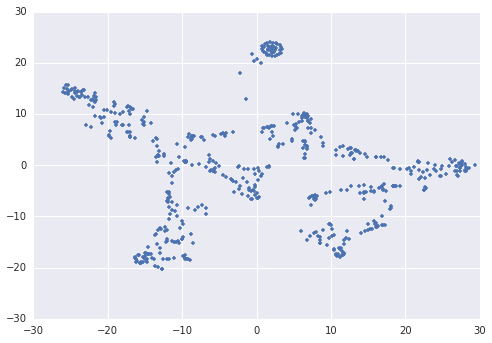

In [214]:
%time course_topic_results = t_SNE_dimension_reduction(course_topic_results)


In [215]:
for col in course_topic_results.columns[1:-3]:
    course_topic_results[col] = course_topic_results[col].astype(float)

In [216]:
import seaborn as sns

In [217]:
course_topic_results.columns

Index([u'course_name', u'Media/Art', u'Data/Stats', u'Biosciences',
       u'Sociology/Entrepreneurship', u'Health', u'Physical Science',
       u'Taught in foreign language', u'full_name', u'tsne_1', u'tsne_2'],
      dtype='object')

In [218]:
course_topic_results.sort([u'art', u'data/stats', u'programming', u'sociology',
       u'climate change/public health', u'fundamental science',
       u'taught in foreign language'], inplace=True)

KeyError: u'art'

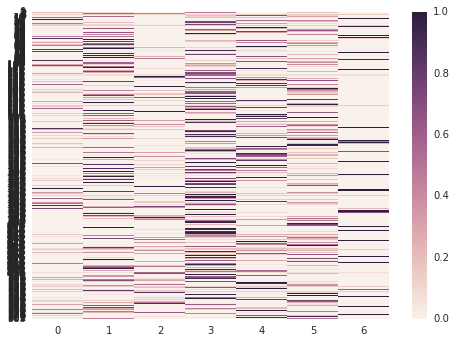

In [194]:

sns.heatmap(course_topic_results.iloc[:,1:-3].values)

In [219]:
course_topic_results.course_name = course_topic_results.full_name
course_topic_results.drop('full_name', inplace=True, axis=1)

In [220]:
from bokeh.plotting import *
from bokeh.models import HoverTool, PanTool, WheelZoomTool, ResetTool
from seaborn import color_palette

def bokeh_visualization(df, num_entries_to_color=10):

    df['color'] = ['navy' for x in range(df.shape[0])]
   
    topics = df.columns[1:]
    colors = color_palette('Set2', 8) + color_palette('Set1', 8) + color_palette('Set3', 4)
    colors = [from_RGB_to_hex(color) for color in colors]
    color_dic = dict(zip(topics, colors[:len(topics)]))
    color_dic['navy'] = 'navy'
    color_dic_rev = {}
    for key, value in color_dic.items():
        color_dic_rev[value] = key
        
    for col in df.columns:
        if col not in [df.columns[0], 'tsne_1', 'tsne_2', 'color']:
            df.sort(col, ascending=False, inplace=True)
            df['color'].iloc[:num_entries_to_color] = col
        
    df.color = df.color.apply(lambda x: color_dic[x])
    
    
    output_file("t_SNE_decomposition_of_attration_topics.html")

    hover = HoverTool(
        tooltips = [("Name", "@desc"),
        ])


    p = figure(plot_width=1000, plot_height=1000, tools=[hover, PanTool(), WheelZoomTool(), ResetTool()],
                   title="t_SNE Decomposition of Courses")

    for color in df.color.unique():
        data_to_plot = df.loc[df.color == color]

        source = ColumnDataSource(
            data=dict(
                x=data_to_plot.tsne_1.values.tolist(),
                y=data_to_plot.tsne_2.values.tolist(),
                desc=data_to_plot.iloc[:,0].values.tolist(),
            )
        )
        fill_color = data_to_plot.color.values.tolist()
        if color == 'navy':
            p.circle('x', 'y', size=18, source=source, legend='Mixed Theme', fill_color=fill_color, line_color='#FFFFFF')
        else:
            p.circle('x', 'y', size=18, source=source, legend=color_dic_rev[color], fill_color=fill_color, line_color='#FFFFFF')

    show(p) 

In [197]:
def from_RGB_to_hex(tup):
    tup = [x*255 for x in tup]
    return '#%02x%02x%02x' % (tup[0], tup[1], tup[2])

In [221]:
bokeh_visualization(course_topic_results, 40)